In [7]:
# Step 3 - Exploring Data
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("IMDb_rating_data_without_nan.csv",index_col = 0)
data.head()

,Name,Genre,ID,Year,Imdb Rating,Director,Votes,Gross,malesRating,malesCount,femalesRating,femalesCount
0,The Dark Knight,Action,tt0468569,2008,9.0,Christopher Nolan,"2,556,384",534.86,9.0,"1,476,807",8.7,"264,598"
1,The Lord of the Rings: The Return of the King,Action,tt0167260,2003,9.0,Peter Jackson,"1,777,166",377.85,9.0,"1,027,904",8.9,"218,150"
2,K.G.F: Chapter 2,Action,tt10698680,2022,8.9,Prashanth Neel,"93,320",92.52,8.3,"13,286",7.5,428
3,Everything Everywhere All at Once,Action,tt6710474,2022,8.8,Dan Kwan,"39,711",92.52,8.7,"17,826",8.7,"3,781"
4,Inception,Action,tt1375666,2010,8.8,Christopher Nolan,"2,269,287",292.58,8.8,"1,260,681",8.7,"293,467"


Text(0, 0.5, 'Frequency')

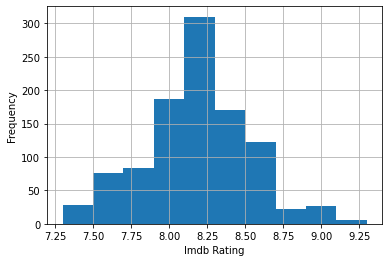

In [11]:
data['Imdb Rating'].hist(bins=10)
plt.xlabel('Imdb Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

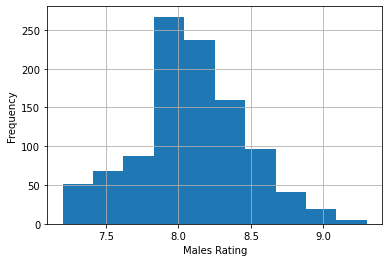

In [12]:
data['malesRating'].hist(bins=10)
plt.xlabel('Males Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

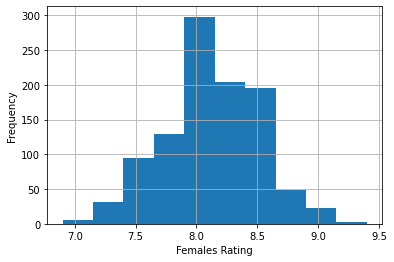

In [18]:
data['femalesRating'].hist(bins=10)
plt.xlabel('Females Rating')
plt.ylabel('Frequency')